In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import datasets,layers, models, Model

In [46]:
# load CIFAR dataset
(X_train, Y_train),(X_test, Y_test) = datasets.cifar10.load_data()

In [47]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [48]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [49]:
Y_train.shape

(50000, 1)

In [50]:
# reshape our dataset
# Y_train = Y_train.reshape(-1)
Y_train.shape

(50000, 1)

In [51]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [52]:
# classes 
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']


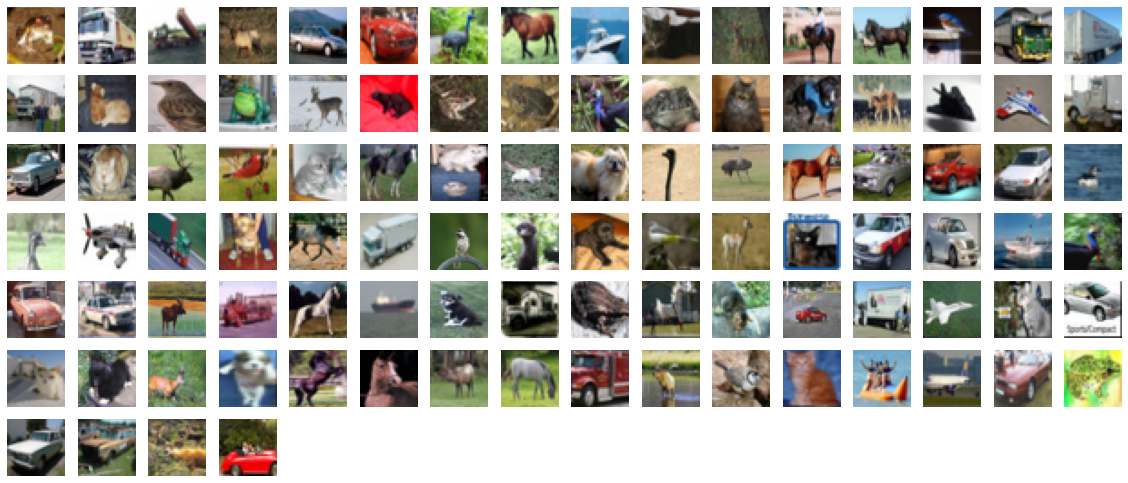

In [53]:
# ploting figures
plt.figure(figsize= (20,20))
for i in range(100):
  plt.subplot(16,16,i+1)
  plt.axis("off")
  plt.imshow(X_train[i])

In [54]:
# normalizations 
X_train = X_train/255
X_test = X_test/255

In [55]:
X_train 

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

<h2>ANN model</h2>

In [56]:
model_ann = models.Sequential([
                               layers.Flatten(input_shape = (32,32,3)),
                               layers.Dense(3000, activation = 'relu'),
                               layers.Dense(2000, activation = 'relu'),
                               layers.Dense(1000, activation = 'relu'),
                               layers.Dense(10, activation = 'softmax'),
])
model_ann.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_ann.fit(X_train, Y_train, epochs = 10)


Epoch 1/10
1563/1563 [==============================] - 19s 10ms/step - loss: 1.8817 - accuracy: 0.3208
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6785 - accuracy: 0.3938
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6094 - accuracy: 0.4181
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5484 - accuracy: 0.4445
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5081 - accuracy: 0.4574
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4766 - accuracy: 0.4691
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4439 - accuracy: 0.4835
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4170 - accuracy: 0.4896
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3902 - accuracy: 0.4965
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [66]:
from sklearn.metrics import  confusion_matrix ,accuracy_score, classification_report 

y_pred = model_ann.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

c_report = classification_report(Y_test, y_pred)
acc = accuracy_score(Y_test,y_pred)
c_matrix = confusion_matrix(Y_test,y_pred)


In [67]:
print("accuracy score :: {} \n\nconfusion matrix :: \n{}\n classification_report:: \n{}".format(acc, c_matrix, c_report))

accuracy score :: 0.4815 

confusion matrix :: 
[[498  38  56  31  35  12  38  27 221  44]
 [ 36 572  21  30  13  16  34  19  86 173]
 [ 88  27 286  91 173  71 160  47  45  12]
 [ 37  20  75 357  57 137 203  30  39  45]
 [ 47  14  90  67 446  45 182  52  43  14]
 [ 21  15  81 238  64 315 163  40  37  26]
 [  6  15  43  97 119  22 652  13  14  19]
 [ 43  19  54  82 109  72  84 444  32  61]
 [ 73  52  11  22  17  14  33  13 714  51]
 [ 37 159   9  46  13  15  40  35 115 531]]
 classification_report:: 
              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1000
           1       0.61      0.57      0.59      1000
           2       0.39      0.29      0.33      1000
           3       0.34      0.36      0.35      1000
           4       0.43      0.45      0.44      1000
           5       0.44      0.32      0.37      1000
           6       0.41      0.65      0.50      1000
           7       0.62      0.44      0.52      1000
        